# Research on the scooter rental service.

We have data on the GoFast scooter rental service. The data should include information about users from several cities and the trips they have made. To make trips around the city, GoFast service users use a mobile application. The service can be used:

- Without a subscription:
    - No subscription fee;
    - Cost per minute of the trip — 8 rubles;
    - Start cost (beginning of the trip) — 50 rubles;

- With an Ultra subscription:
    - Subscription fee — 199 rubles per month;
    - Cost per minute of the trip — 6 rubles;
    - Start cost — free.

There are several types of data for each user:
- Unique ID
- Name
- Age
- City
- Subscription type

Information about their trips includes:
- Unique ID
- Distance
- Duration
- Travel date
- About subscription types:

Subscription type:
- Cost per minute of the trip
- Start cost of the trip
- Monthly payment cost

Main research hypotheses:
- Do subscription users spend more time on trips?
- Do subscription users not exceed the optimal distance of one trip at 3130 meters?
- Check whether the revenue from subscription users is higher compared to users without a subscription.
- Check, using the hypothesis of equality of means for dependent (paired) samples, whether the number of support requests decreased after the server update.

Also, it is necessary to check:
- Find out the minimum number of clients to send promo codes to during the promotion so that the probability of not meeting the plan is approximately 5%.
- Estimate the probability that no more than 399.5 thousand users will open a push notification out of 1 million notifications in total.

Research process:
- Using data from the files '/datasets/users_go.csv', '/datasets/rides_go.csv', and '/datasets/subscriptions_go.csv', the first step is to determine the quality of the data.
- Data preprocessing, error correction, filling in missing values, or removing anomalous values.
- Data merging for research purposes.
- Data analysis and calculation of key parameters.

Conclusions based on the analysis.

## Data Loading

Add all the libraries needed for this analysis.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

Extracting data from files.

In [2]:
users = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/users_go.csv')
rides = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/rides_go.csv')
subscriptions = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/subscriptions_go.csv')

Let's output the first 10 rows of each dataframe to ensure that the files have been successfully extracted.

In [3]:
display(users)
print()
display(rides)
print()
display(subscriptions)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


## Data Preprocessing

Let's check the data for missing values and obvious duplicates:

In [4]:
print(users.isna().sum())
print()
print(rides.isna().sum())
print()
print(subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [5]:
print('users duplicates =', users.duplicated().sum())
print()
print('rides duplicates = ', rides.duplicated().sum())
print()
print('subscriptions duplicates = ', subscriptions.duplicated().sum())

users duplicates = 31

rides duplicates =  0

subscriptions duplicates =  0


Let's look at duplicate rows in the 'users' dataframe.

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


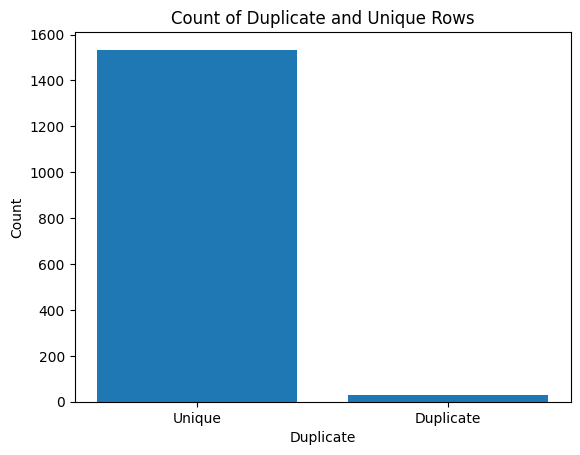

False    1534
True       31
Name: count, dtype: int64

In [6]:
duplicates_counts = users[users.duplicated()]
display(duplicates_counts)

duplicates_counts = users.duplicated().value_counts()

plt.bar(['Unique', 'Duplicate'], duplicates_counts)
plt.xlabel('Duplicate')
plt.ylabel('Count')
plt.title('Count of Duplicate and Unique Rows')
plt.show()

duplicates_counts

It seems that the data has been entered twice, so let's remove the obvious duplicates.

In [7]:
users.drop_duplicates(inplace=True)
print('users duplicates =', users.duplicated().sum())

users duplicates = 0


Let's output general information about each dataframe.

In [8]:
print(users.info())
print()
print(rides.info())
print()
print(subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 

The data is generally stored in appropriate data types for cells, except for the 'date' column in the 'rides' dataframe. Let's convert this column to the pandas date type and also create an additional column where we'll place the month from the 'date' column.

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
# Check how many years of data are provided to avoid overlapping months if the data spans more than one year.
pivot_result = pd.pivot_table(rides, index=rides['date'].dt.year, aggfunc='size')
display(pivot_result)
# Since the provided data spans only one year, there won't be any overlapping months.
rides['month'] = pd.DatetimeIndex(rides['date']).month 
display(rides)

date
2021    18068
dtype: int64

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


## Exploratory Data Analysis.

Let's describe and visualize general information about users:

__Display the frequency of occurrence of cities.__

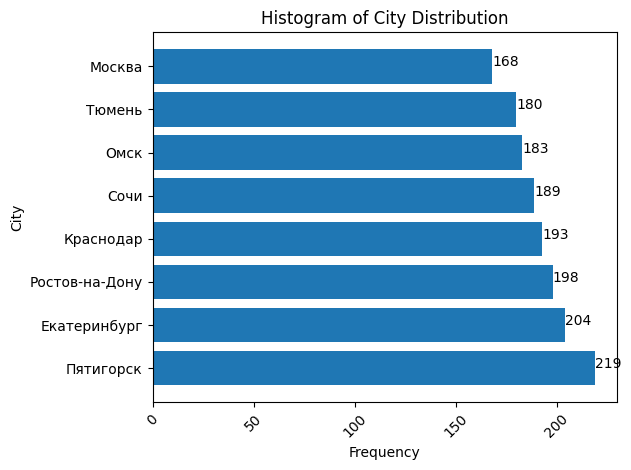

In [10]:
city_counts = users['city'].value_counts()

plt.barh(city_counts.index, city_counts.values)
plt.xlabel('Frequency')
plt.ylabel('City')
plt.title('Histogram of City Distribution')

plt.xticks(rotation=45)

for index, value in enumerate(city_counts.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

_Conclusion_: According to the graph, most of the data is from Pyatigorsk, and the least is from Moscow.

Now, let's look at the ratio of users with a subscription and without.

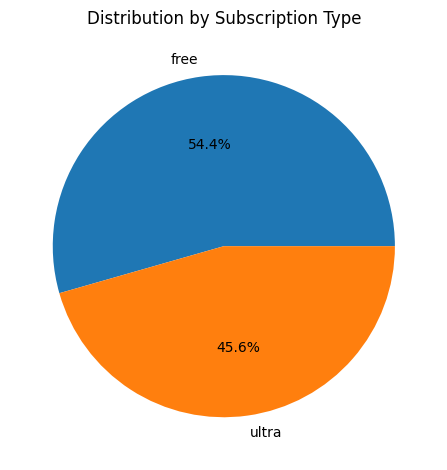

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [11]:
users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution by Subscription Type')

plt.tight_layout()
plt.show()

users['subscription_type'].value_counts()

_Conclusion_: Subscribed users account for 45.6%, while unsubscribed users make up 54.4%. The number of unsubscribed users is higher by 19% compared to subscribed users.

Let's display and analyze the age distribution of users.

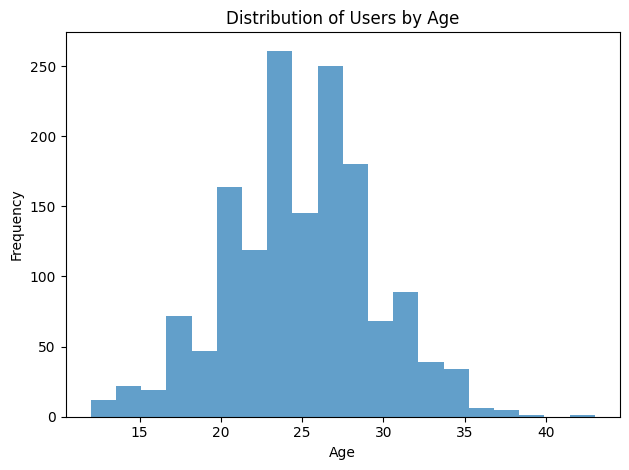

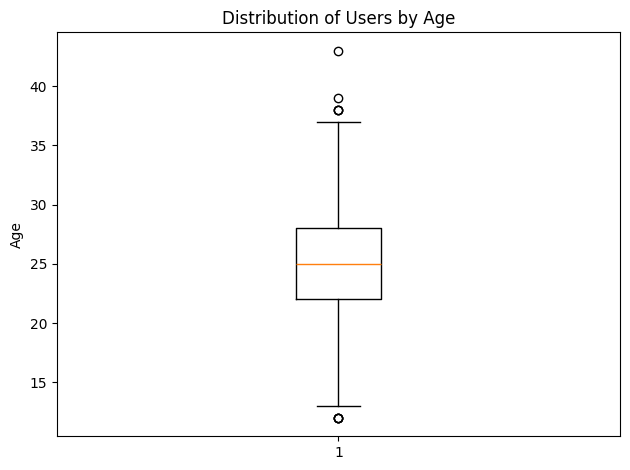

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [12]:
plt.hist(users['age'], bins=20, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Users by Age')
plt.tight_layout()
plt.show()

plt.boxplot(users['age'])
plt.ylabel('Age')
plt.title('Distribution of Users by Age')

plt.tight_layout()
plt.show()

users['age'].describe()

_Conclusion_: The average age of users is 20-30 years, indicating that our main target audience falls within this age range.

Let's display and analyze the distance that a user travels in one trip.

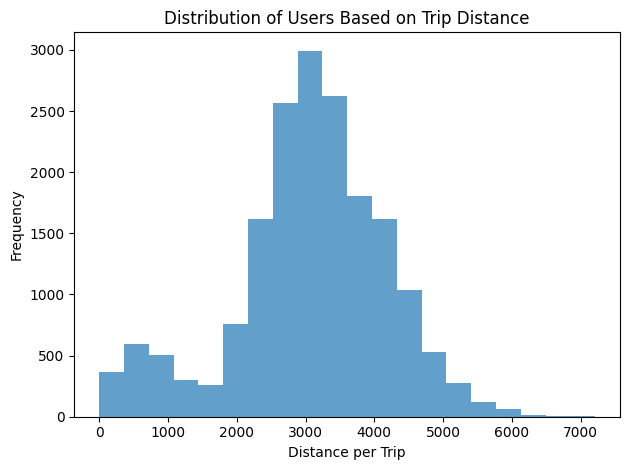

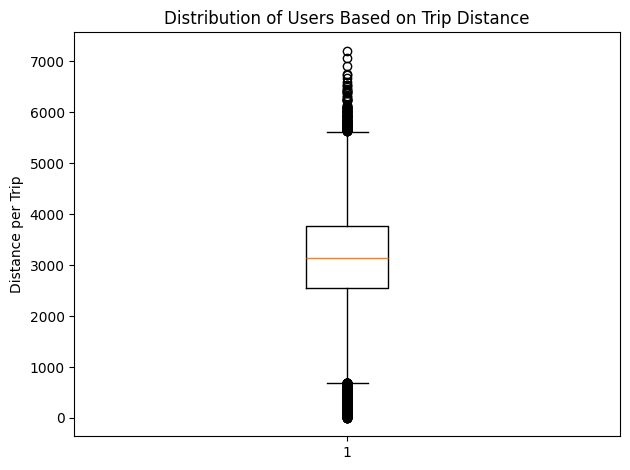

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [13]:
plt.hist(rides['distance'], bins=20, alpha=0.7)
plt.xlabel('Distance per Trip')
plt.ylabel('Frequency')
plt.title('Distribution of Users Based on Trip Distance')
plt.tight_layout()
plt.show()

plt.boxplot(rides['distance'])
plt.ylabel('Distance per Trip')
plt.title('Distribution of Users Based on Trip Distance')

plt.tight_layout()
plt.show()

rides['distance'].describe()

_Conclusion_: The histogram shows a normal distribution, but there are outliers below 1000 meters and above 6000 meters. Preliminarily, it can be assumed that the average distance per trip is close to the optimal value of 3130 meters. However, the number of trips exceeding this value is also quite large, with over 1500+ trips. I believe these are real data rather than technical or human errors.

Let's display and analyze the data on the duration of trips.

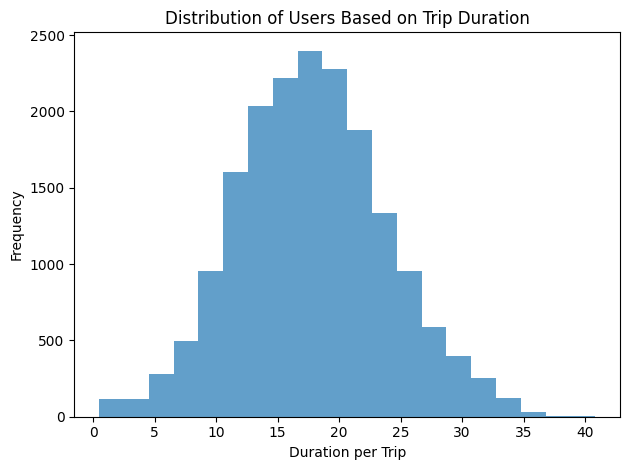

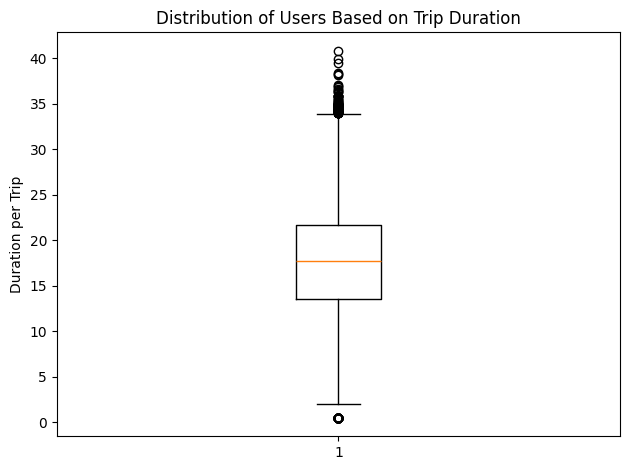

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [14]:
plt.hist(rides['duration'], bins=20, alpha=0.7)
plt.xlabel('Duration per Trip')
plt.ylabel('Frequency')
plt.title('Distribution of Users Based on Trip Duration')
plt.tight_layout()
plt.show()

plt.boxplot(rides['duration'])
plt.ylabel('Duration per Trip')
plt.title('Distribution of Users Based on Trip Duration')

plt.tight_layout()
plt.show()

rides['duration'].describe()

_Conclusion_: The graph shows a normal distribution of values with outliers in "less than a minute" and "more than 35 minutes." Preliminarily, it can be assumed that the average trip duration is between 10 and 25 minutes. The shortest trips are around zero, and the longest trips are around 40 minutes.

_Overall Conclusion_: After preliminary analysis, several conclusions can be drawn:

- The majority of data is from Pyatigorsk.
- The percentage of subscribed users is 45.6%, and unsubscribed users are 54.4%. On average, based on the data, unsubscribed users are higher by 19% compared to subscribed users.
- The average age of users falls within the range of 20 to 30 years.
- The average distance covered in one trip fits the optimal value of 3130 meters. However, the number of trips exceeding this value is quite significant—over 1500.
- The average trip duration ranges from 10 to 25 minutes.

## Data Integration

Let's combine the data into a common dataframe named 'summary' for ease of analysis.

In [15]:
merged_df = pd.merge(users, rides, on='user_id', how='inner')

summary = pd.merge(merged_df, subscriptions, on='subscription_type', how='inner')

print(summary.head())
print()
print(summary.info())

   user_id  name  age    city subscription_type     distance   duration  \
0        1  Кира   22  Тюмень             ultra  4409.919140  25.599769   
1        1  Кира   22  Тюмень             ultra  2617.592153  15.816871   
2        1  Кира   22  Тюмень             ultra   754.159807   6.232113   
3        1  Кира   22  Тюмень             ultra  2694.783254  18.511000   
4        1  Кира   22  Тюмень             ultra  4028.687306  26.265803   

        date  month  minute_price  start_ride_price  subscription_fee  
0 2021-01-01      1             6                 0               199  
1 2021-01-18      1             6                 0               199  
2 2021-04-20      4             6                 0               199  
3 2021-08-11      8             6                 0               199  
4 2021-08-28      8             6                 0               199  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Co

Now let's create two new dataframes. In one, we will store data about users with a subscription, and in the other, without a subscription.

In [16]:
users_with_subscription = merged_df[merged_df['subscription_type'] == 'ultra']

users_without_subscription = merged_df[merged_df['subscription_type'] == 'free']

print(users_with_subscription['subscription_type'].value_counts())
print()
print(users_without_subscription['subscription_type'].value_counts())

subscription_type
ultra    6500
Name: count, dtype: int64

subscription_type
free    11568
Name: count, dtype: int64


And let's visualize information about the distance and duration of trips for users in both categories.

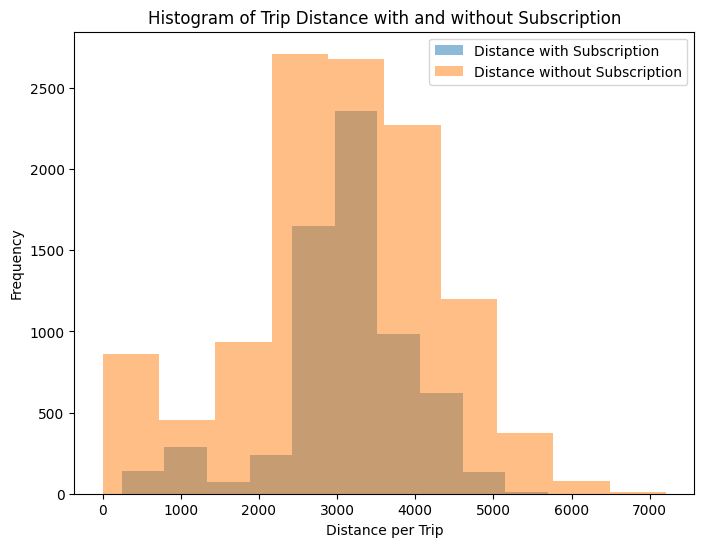

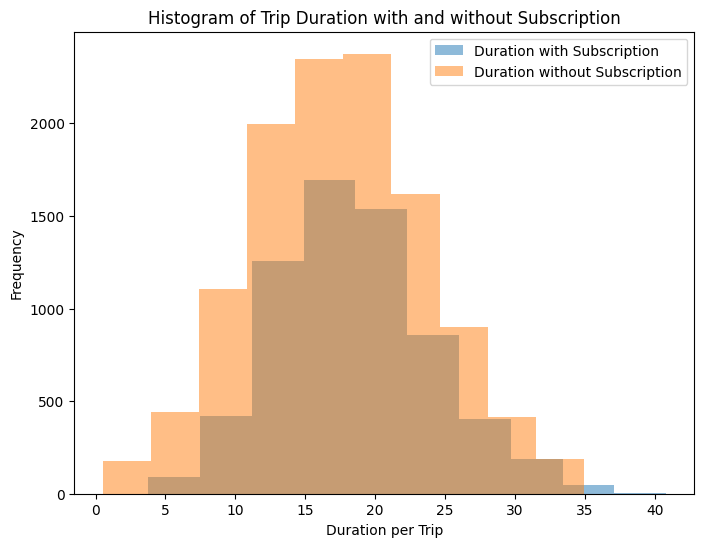

In [17]:
plt.figure(figsize=(8, 6))

plt.hist(users_with_subscription['distance'], bins=10, alpha=0.5, label='Distance with Subscription')

plt.hist(users_without_subscription['distance'], bins=10, alpha=0.5, label='Distance without Subscription')

plt.title('Histogram of Trip Distance with and without Subscription')
plt.xlabel('Distance per Trip')
plt.ylabel('Frequency')
plt.legend()

plt.show()

plt.figure(figsize=(8, 6))

plt.hist(users_with_subscription['duration'], bins=10, alpha=0.5, label='Duration with Subscription')

plt.hist(users_without_subscription['duration'], bins=10, alpha=0.5, label='Duration without Subscription')

plt.title('Histogram of Trip Duration with and without Subscription')
plt.xlabel('Duration per Trip')
plt.ylabel('Frequency')
plt.legend()

plt.show()

_Conclusion_: Based on the obtained graphs, it can be assumed that users with and without a subscription generally exhibit similar behavioral patterns. Both the duration and distance per trip align. It's worth noting the high frequency of zero values in the distance for users without a subscription; these rows could be considered for removal.

## Revenue Calculation

Let's create a new aggregated dataframe based on 'summary' where we'll add the total duration, total distance, and the number of trips for each month. 
Additionally, we'll add a column for monthly revenue generated by each user. To calculate this, we'll refer to the payment conditions for subscribers and non-subscribers. We'll round the duration of each trip in each row of the original dataframe to the next integer for cost calculation; for example, values like 25.3, 25.5, and 26.0 should be rounded to 26.

In [18]:
# Before creating aggregated dataframes, round the values of trip duration for all users.
summary['duration'] = np.ceil(summary['duration'])
# For added reliability, convert float to int
summary['duration'] = summary['duration'].astype(int)
# Check how the rounding of data has been done
display(summary['duration'])

0        26
1        16
2         7
3        19
4        27
         ..
18063    20
18064    22
18065    19
18066    17
18067    16
Name: duration, Length: 18068, dtype: int64

In [19]:
# Create a new aggregated dataframe
total_summary = summary.groupby(['user_id', 'month']).agg(
    subscription_type=('subscription_type', 'first'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee', 'first'),
    total_duration=('duration', 'sum'),
    total_distance=('distance', 'sum'),
    total_rides=('user_id', 'count')
).reset_index()

display(total_summary)

# Check for missing values in the resulting pivot table
print(total_summary.info())

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,total_duration,total_distance,total_rides
0,1,1,ultra,6,0,199,42,7027.511294,2
1,1,4,ultra,6,0,199,7,754.159807,1
2,1,8,ultra,6,0,199,46,6723.470560,2
3,1,10,ultra,6,0,199,32,5809.911100,2
4,1,11,ultra,6,0,199,56,7003.499363,3
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,26,3409.468534,2
11327,1534,8,free,8,50,0,48,7622.453034,2
11328,1534,9,free,8,50,0,23,4928.173852,1
11329,1534,11,free,8,50,0,78,13350.015305,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int32  
 2   subscription_type  11331 non-null  object 
 3   minute_price       11331 non-null  int64  
 4   start_ride_price   11331 non-null  int64  
 5   subscription_fee   11331 non-null  int64  
 6   total_duration     11331 non-null  int64  
 7   total_distance     11331 non-null  float64
 8   total_rides        11331 non-null  int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 752.6+ KB
None


In [20]:
# Add a column with the total monthly revenue per user
total_summary['monthly_revenue'] = total_summary['total_duration'] * total_summary['minute_price'] + \
                                    (total_summary['start_ride_price'] * total_summary['total_rides']) + \
                                    total_summary['subscription_fee']

# Check the resulting column
display(total_summary)
print(total_summary.info())

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,total_duration,total_distance,total_rides,monthly_revenue
0,1,1,ultra,6,0,199,42,7027.511294,2,451
1,1,4,ultra,6,0,199,7,754.159807,1,241
2,1,8,ultra,6,0,199,46,6723.470560,2,475
3,1,10,ultra,6,0,199,32,5809.911100,2,391
4,1,11,ultra,6,0,199,56,7003.499363,3,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,26,3409.468534,2,308
11327,1534,8,free,8,50,0,48,7622.453034,2,484
11328,1534,9,free,8,50,0,23,4928.173852,1,234
11329,1534,11,free,8,50,0,78,13350.015305,4,824


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int32  
 2   subscription_type  11331 non-null  object 
 3   minute_price       11331 non-null  int64  
 4   start_ride_price   11331 non-null  int64  
 5   subscription_fee   11331 non-null  int64  
 6   total_duration     11331 non-null  int64  
 7   total_distance     11331 non-null  float64
 8   total_rides        11331 non-null  int64  
 9   monthly_revenue    11331 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 841.1+ KB
None


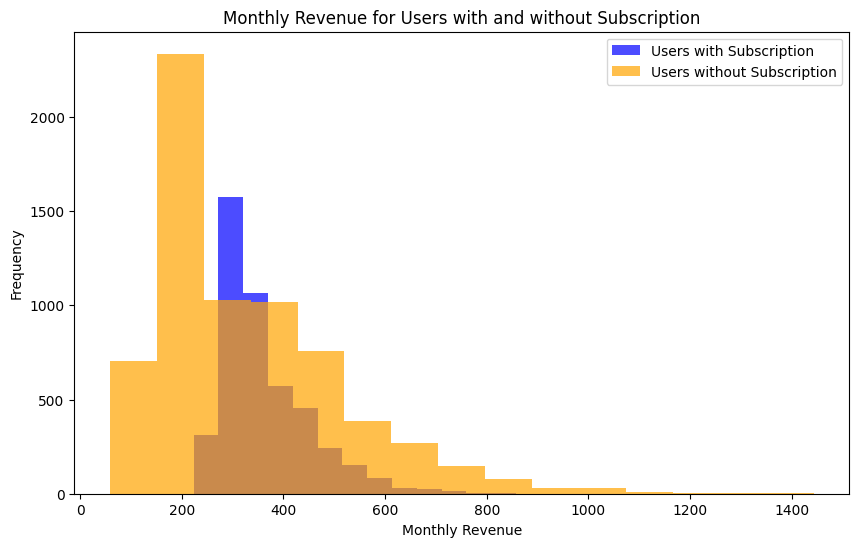

In [21]:
# Plot to visualize the obtained data
plt.figure(figsize=(10, 6))

plt.hist(total_summary[total_summary['subscription_type'] == 'ultra']['monthly_revenue'], bins=15, color='blue', alpha=0.7,
         label='Users with Subscription')

plt.hist(total_summary[total_summary['subscription_type'] == 'free']['monthly_revenue'], bins=15, color='orange', alpha=0.7,
         label='Users without Subscription')

plt.title('Monthly Revenue for Users with and without Subscription')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.legend()

plt.show()

_Conclusion_: Based on these two histograms, it can be inferred that the revenue from users with a subscription is higher. Despite the fact that the sample of users without a subscription is larger in quantitative terms.

## Hypothesis Testing

__Hypothesis 1__: Do users with a subscription spend more time on trips?

Formulate the null hypothesis (H0) - Users with and without a subscription spend the same amount of time on trips.

Alternative hypothesis (H1) - Users with a subscription spend more time on trips.

In [22]:
hypothesis01 = st.ttest_ind(summary[summary['subscription_type'] == 'ultra']['duration'],
                                    summary[summary['subscription_type'] == 'free']['duration'],
                      equal_var=False, alternative='greater')

print("p-value:", hypothesis01.pvalue)  

alpha = 0.05
if hypothesis01.pvalue < alpha:
    print("We reject the null hypothesis: users with a subscription spend more time on trips.")
else:
    print("We failed to reject the null hypothesis: the trip duration for users with and without a subscription does not differ significantly.")

p-value: 1.1814679253701353e-36
We reject the null hypothesis: users with a subscription spend more time on trips.


Let's visualize the data for clarity.

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64
count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64


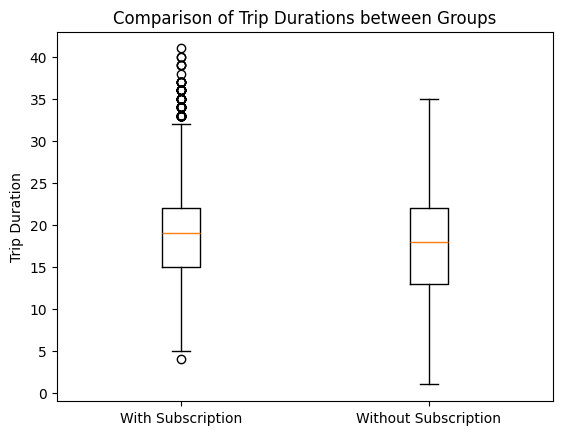

In [23]:
print(summary[summary['subscription_type'] == 'ultra']['duration'].describe())
print(summary[summary['subscription_type'] == 'free']['duration'].describe())

plt.boxplot([summary[summary['subscription_type'] == 'ultra']['duration'],
             summary[summary['subscription_type'] == 'free']['duration']],
            labels=['With Subscription', 'Without Subscription'])
plt.ylabel('Trip Duration')
plt.title('Comparison of Trip Durations between Groups')
plt.show()

_Conclusion_: Subscribed users indeed spend more time on trips on average than users without a subscription. The hypothesis proved to be correct.

__Second Hypothesis__: Do subscribed users exceed the optimal distance of 3130 meters for a single trip?

Formulating hypotheses:
Null Hypothesis (H0): The mean distance of subscribed users for a single trip is equal to 3130 meters.

Alternative Hypothesis (H1): The mean distance of subscribed users for a single trip is greater than 3130 meters.

I will conduct a one-sided right t-test, cutting off the left tail.

In [24]:
interested_value = 3130
hypothesis02 = st.ttest_1samp(summary[summary['subscription_type'] == 'ultra']['distance'],
                              interested_value, alternative='greater')

print("p-value:", hypothesis02.pvalue)

alpha = 0.05
if hypothesis02.pvalue < alpha:
    print("Rejected null hypothesis: The mean distance of subscribed users for a single trip is greater than 3130 meters.")
else:
    print("Failed to reject the null hypothesis: The mean distance of subscribed users for a single trip does not exceed 3130 meters.")

p-value: 0.9195368847849785
Failed to reject the null hypothesis: The mean distance of subscribed users for a single trip does not exceed 3130 meters.


Visualizing the data

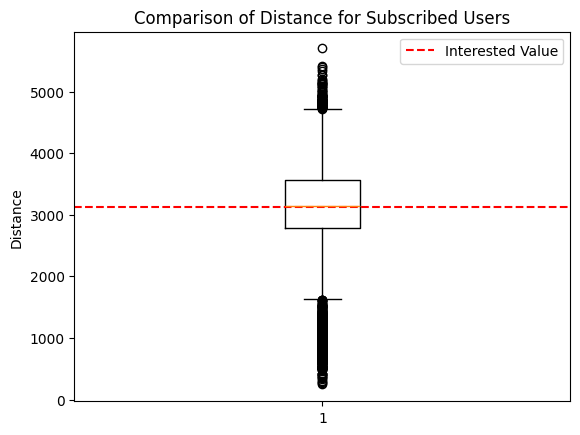

In [25]:
interested_value = 3130

plt.boxplot(summary[summary['subscription_type'] == 'ultra']['distance'])
plt.axhline(y=interested_value, color='r', linestyle='--', label='Interested Value')
plt.ylabel('Distance')
plt.title('Comparison of Distance for Subscribed Users')
plt.legend()
plt.show()

_Conclusion_: Based on the obtained data, it appears that the mean is equal to the interested value. The hypothesis proved to be correct.

__Third Hypothesis__: To check if the monthly revenue from subscribed users is higher compared to users without a subscription.

Formulating hypotheses:

Null Hypothesis (H0) - Monthly revenue from both groups of users is equal or differs insignificantly.

Alternative Hypothesis (H1) - Monthly revenue from subscribed users is higher than that from users without a subscription.

In [26]:
alpha = 0.05
hypothesis03 = st.ttest_ind(total_summary[total_summary['subscription_type'] == 'ultra']['monthly_revenue'],
                            total_summary[total_summary['subscription_type'] == 'free']['monthly_revenue'],
                            equal_var=False, alternative='greater')

print("p-value:", hypothesis03.pvalue)

if hypothesis03.pvalue < alpha:
    print("Reject the null hypothesis: Monthly revenue from subscribed users is higher than that from users without a subscription.")
else:
    print("Failed to reject the null hypothesis: Monthly revenue from both groups of users is equal or differs insignificantly.")

p-value: 8.874140893976874e-40
Reject the null hypothesis: Monthly revenue from subscribed users is higher than that from users without a subscription.


Visualizing the data

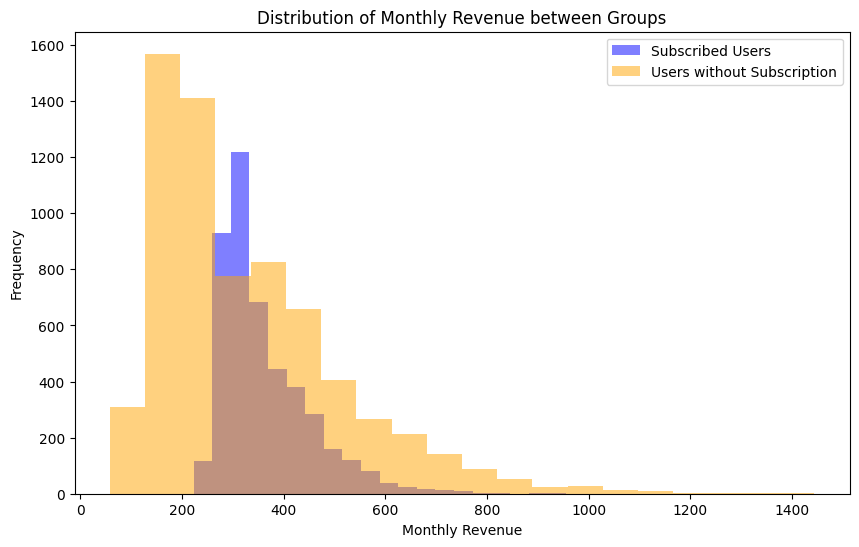

In [27]:
plt.figure(figsize=(10, 6))

plt.hist(total_summary[total_summary['subscription_type'] == 'ultra']['monthly_revenue'], bins=20, alpha=0.5,
         color='blue', label='Subscribed Users')
plt.hist(total_summary[total_summary['subscription_type'] == 'free']['monthly_revenue'], bins=20, alpha=0.5,
         color='orange', label='Users without Subscription')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Revenue between Groups')
plt.legend()
plt.show()

_Conclusion_: After testing the last hypothesis that the monthly revenue from subscribed users would be higher than that from users without a subscription, it was found that their monthly revenue is indeed higher than that of users without a subscription.

__Fourth Hypothesis__: To check whether the number of support service inquiries decreased after server updates.

I assume, since we have two samples, before and after the update, and they are dependent, a t-test for paired samples would be suitable. scipy.stats.ttest_rel()

## MAIN RESEARCH CONCLUSION:
- During the data reading and preprocessing stage, no significant anomalies, missing values, or explicit duplicates were found, indicating good quality of the initial data, which should generally have a positive effect on the relevance and accuracy of the obtained results. It is noted that only 31 rows were removed during the preprocessing stage.
- The majority of the data was obtained from the city of Pyatigorsk, with the least from Moscow. This implies that the data analyzed is more relevant for Pyatigorsk.
- The difference in the number of subscribed and non-subscribed users is around 19%, favoring users without a subscription. Thus, there are more users without a subscription.
- The analysis of age revealed that the users are predominantly young people aged 20 to 30.
- The analysis of the average distance of a single trip showed that it falls within the optimal value related to scooter wear and tear, namely 3130 meters.
- The analysis of the average trip duration revealed that the average duration of a trip is between 10 to 25 minutes. The shortest trips are around zero (but not exactly zero, indicating quality data), and the longest ones are 40 minutes, but such instances are extremely rare.
- Next, all the data was combined into a unified table to test the hypotheses put forward by the project's product managers.
- Checking the first hypothesis, which suggested that the average usage duration of scooters by subscribed users is higher, it was found that subscribed users indeed spend more time on trips on average than users without a subscription. The hypothesis proved to be correct.
- The second hypothesis aimed to verify that the average distance of a single trip does not exceed the optimal value of 3130 meters. The analysis revealed that the average does not exceed the interested value. Therefore, the hypothesis that subscribed users do not exceed a distance of 3130 meters per trip is accurate.
- The third hypothesis aimed to determine whether the monthly revenue from subscribed users is higher than that from users without a subscription. The hypothesis is correct. Subscribed users do bring in more revenue each month than users without a subscription.

__OVERALL CONCLUSION: The target audience of the project is young, active people aged 20 to 30. The percentage of users without a subscription is 54.4%, and users with a subscription account for 45.6%. All three hypotheses put forward by the product managers proved to be correct. The average duration of trips for subscribed users is indeed higher than for users without a subscription. The average distance of a single trip for subscribed users does not exceed 3130 meters. The average monthly revenue for subscribed users is indeed higher than for users without a subscription. Therefore, subscribed users are more beneficial for the company due to their behavioral patterns in terms of average trip duration, optimal distance per trip, and average monthly revenue they bring to the company.__

## Distributions

The marketing department of GoFast has set a task: to conduct a promotion with the distribution of promo codes for one free month of subscription, where at least 100 existing customers should renew their subscription. After the trial period, the user can either refuse the subscription or extend it by making the corresponding payment. This promotion has already been conducted before, and it was found that after the free trial period, 10% of users renew their subscription. Find out the minimum number of promo codes that need to be sent out to achieve a probability of not meeting the plan of approximately 5%. Choose the parameters of the distribution describing this situation, plot the distribution graph, and formulate an answer to the question of the number of promo codes.

Optimal number of clients (N): 990


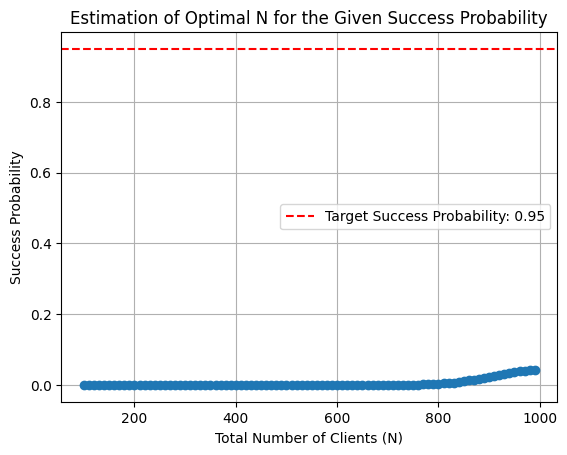

In [28]:
p_success = 0.10
target_success_rate = 0.95
min_clients = 100

# Range of values for N (total number of clients)
N_values = np.arange(100, 1000, 10)

# Calculate success probability values for each N
pmf_values = [st.binom.pmf(min_clients, N, p_success) for N in N_values]

# Find the closest value to the target success probability
closest_index = np.argmin(np.abs(np.array(pmf_values) - target_success_rate))
optimal_N = N_values[closest_index]

print(f"Optimal number of clients (N): {optimal_N}")

# Plotting
plt.plot(N_values, pmf_values, marker='o')
plt.axhline(y=target_success_rate, color='r', linestyle='--', label=f'Target Success Probability: {target_success_rate}')
plt.xlabel("Total Number of Clients (N)")
plt.ylabel("Success Probability")
plt.title("Estimation of Optimal N for the Given Success Probability")
plt.legend()
plt.grid(True)
plt.show()

_Conclusion_: The optimal number of clients at which the cumulative probability approaches the specified probability of not meeting the plan (0.05%) is 990 clients. The graph shows that this value will be at the intersection of cumulative probability values and the target probability of plan failure at 5%. Therefore, the marketing department needs to send out promo codes to 990 clients to achieve the desired number of subscriptions after the promotion.

The marketing department sends push notifications to customers in the mobile app. Customers may either open or not open these notifications. It is known that approximately 40% of the customers who receive notifications open them. The department plans to send out 1 million notifications. Using approximation, construct an approximate distribution graph and estimate the probability that no more than 399.5 thousand users will open the notification.

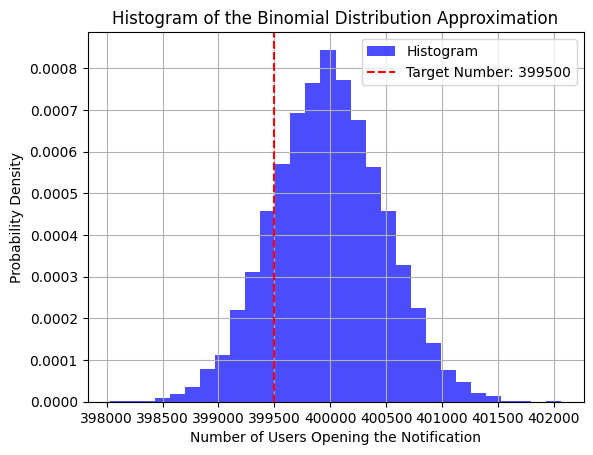

In [29]:
p_success = 0.40
n = 1000000  # number of sent notifications
target_users = 399500

# Normal approximation of the binomial distribution
mean = n * p_success
std_dev = np.sqrt(n * p_success * (1 - p_success))

# Generating values for histogram
samples = np.random.normal(mean, std_dev, size=10000)  # Generate a sample for the histogram

# Histogram plot
plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Vertical line for the target number
plt.axvline(x=target_users, color='r', linestyle='--', label=f'Target Number: {target_users}')

plt.xlabel("Number of Users Opening the Notification")
plt.ylabel("Probability Density")
plt.title("Histogram of the Binomial Distribution Approximation")
plt.legend()
plt.grid(True)
plt.show()

_Conclusion_: The probability that, after sending notifications to 1,000,000 clients, the number of users not opening the notification will be no more than 399,500 people is approximately 15%. There are decent chances that the campaign will be successful.